In [1]:
#Using this file as a companion for Implementing Deep Neural Network from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from nn_from_scratch import initialize_params, forward_linear, forward_activation, forward_propagation, compute_cost, backward_linear, backward_activation, backward_propagation, update_parameters

c:\Users\Abhirama Karthikeya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load the sample data. I am using Fashion MNSIT for a relatively simple binary classification task
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#Fashion contains greyscale images of 10 different clothing items. For our Binary Classification task, we will only select two classes
binary_classes = [0, 1]

#Using pipe separator for element wise logical operation. "or" expects single boolean values, not arrays
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

In [5]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (60000, 28, 28)
Shape of y_Train (60000,)
Shape of X_Test (10000, 28, 28)
Shape of y_Test (10000,)


In [6]:
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [7]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (12000, 28, 28)
Shape of y_Train (12000,)
Shape of X_Test (2000, 28, 28)
Shape of y_Test (2000,)


In [8]:
#Currently our images are 2D (28x28). We add a channel (like RGB, but here it is just 1 because it is greyscale) for consistency when using frameworks
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (12000, 28, 28, 1)
Shape of y_Train (12000,)
Shape of X_Test (2000, 28, 28, 1)
Shape of y_Test (2000,)


In [10]:
#Flatten the images so that they are 1D vectors. Use -1 placeholder to tell the library to automatically calculate the dimension based on the other specified dimensions.
#Transpose the arrays so that the shape becomes (num_pixels, num_images)
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

#Normalize the images. Simple enough dataset, Divide by 255 so that each pixel will have value between 0 and 1
X_train = X_train_flatten / 255.0
X_test = X_test_flatten / 255.0

#Reshape Y so that it is of the shape (1,m)
y_train = y_train.reshape(1, 12000)
y_test = y_test.reshape(1, 2000)

In [11]:
#Shape will be 28*28*1 because of -1 placeholder
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (784, 12000)
Shape of y_Train (1, 12000)
Shape of X_Test (784, 2000)
Shape of y_Test (1, 2000)


In [12]:
#Implementing the L-layer neural network
#Define Network Achitecture
layers = [784, 18, 12, 6, 1] #5 layer model with 784 input features. 

def model(X, Y, layers, learning_rate = 0.005, iterations = 3000, print_cost = True):
    """
    Implements a L-layer neural network based on layers
    
    Inputs -- X, Y, layers, learning_rate, number of iterations of GD, print cost after some iterations (True/False)
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []
    #Initialize the parameters
    parameters = initialize_params(layers)

    for i in range(iterations):

        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(AL, Y, caches)

        #Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and (i % 200 == 0 or i == iterations - 1):
            print(f"Cost after {i} iterations is ", cost)
        if i % 500 == 0 or i == iterations - 1:
            costs.append(cost)

    return parameters, costs

In [13]:
#Train the model 
parameters, costs = model(X_train, y_train, layers, iterations=3000, print_cost=True)

Cost after 0 iterations is  0.6840883986029915


Cost after 200 iterations is  0.23367918424626558
Cost after 400 iterations is  0.128724540598816
Cost after 600 iterations is  0.09493563189001304
Cost after 800 iterations is  0.07571345006087923
Cost after 1000 iterations is  0.06517668691373986
Cost after 1200 iterations is  0.058880155375477174
Cost after 1400 iterations is  0.054629606232337626
Cost after 1600 iterations is  0.05152746624650888
Cost after 1800 iterations is  0.04913347473822351
Cost after 2000 iterations is  0.04721530752097485
Cost after 2200 iterations is  0.04562623186333657
Cost after 2400 iterations is  0.044279685941531984
Cost after 2600 iterations is  0.04311003565899545
Cost after 2800 iterations is  0.04208042133263575
Cost after 2999 iterations is  0.04116634733305378


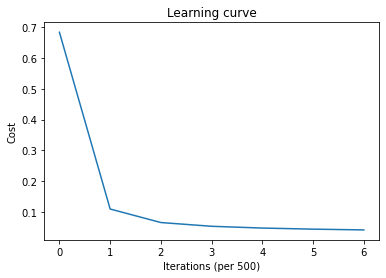

In [14]:
plt.plot(costs)
plt.xlabel('Iterations (per 500)')
plt.ylabel('Cost')
plt.title('Learning curve')
plt.show()

In [17]:
X_train.shape

(784, 12000)

In [18]:
y_train.shape

(1, 12000)

In [32]:
predictions_train = (forward_propagation(X_train, parameters)[0] > 0.5).astype(int)
predictions_test = (forward_propagation(X_test, parameters)[0] > 0.5).astype(int)


In [33]:
predictions_train

array([[0, 0, 1, ..., 1, 1, 0]])

In [35]:
training_accuracy = np.mean(predictions_train == y_train)
training_accuracy


0.9868333333333333

In [36]:
test_accuracy = np.mean(predictions_test == y_test)
test_accuracy

0.9815